## 3.2 基于前向神经网络的分类预测

### 读入数据并展示

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据集
large_train = pd.read_csv('D:\python_protect\机器学习\实验三\图像分类-dataset\largeTrain.csv')
large_validation = pd.read_csv('D:\python_protect\机器学习\实验三\图像分类-dataset\largeValidation.csv')


medium_train = pd.read_csv('D:\python_protect\机器学习\实验三\图像分类-dataset\mediumTrain.csv')
medium_validation = pd.read_csv('D:\python_protect\机器学习\实验三\图像分类-dataset\mediumValidation.csv')

small_train = pd.read_csv('D:\python_protect\机器学习\实验三\图像分类-dataset\smallTrain.csv')
small_validation = pd.read_csv('D:\python_protect\机器学习\实验三\图像分类-dataset\smallValidation.csv')

Label = {0:'a', 1:'e', 2:'g', 3:'i', 4:'l', 5:'n', 6:'o', 7:'r', 8:'t', 9:'u'}
# 随机抽取十个图像进行输出
def show_random_images(dataset, num_images=10):
    random_indices = np.random.choice(len(dataset), num_images, replace=False)

    for i, idx in enumerate(random_indices):
        label = dataset.iloc[idx, 0]
        image_data = dataset.iloc[idx, 1:]  # 图像数据位于第二列以及之后的列

        # 将一维数据转为矩阵形式（假设是灰度图，如果是RGB图需要调整维度）
        image_matrix = np.array(image_data).reshape((16, 8))
        # 显示图像
        plt.subplot(2, 5, i + 1)
        plt.imshow(image_matrix, cmap='gray')
        plt.title(f"Label: {Label[label]}")
        plt.axis('off')

    plt.show()

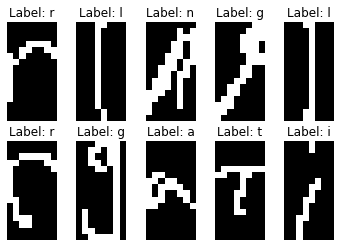

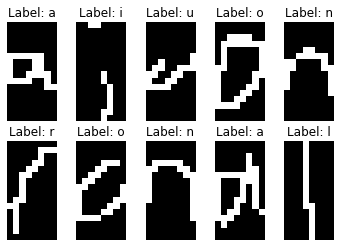

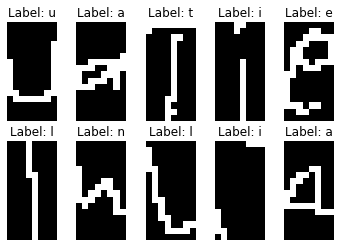

In [6]:
# 显示十个large_train
show_random_images(large_train)
show_random_images(medium_train)
show_random_images(small_train)


## 任务二：基于pytorch实现分类任务

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

class NetWork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2,  output_size):
        super(NetWork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.Sigmoid()

        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.Sigmoid()

        self.fc3 = nn.Linear(hidden_size2, output_size)


    def forward(self, x):
        a1 = self.relu1(self.fc1(x))
        a2 = self.relu2(self.fc2(a1))
        a3 = F.softmax(self.fc3(a2), dim=1)
        return a3



In [39]:
def load_data(train_data, test_data):
    # 提取特征和标签
    X_train, y_train = torch.tensor(train_data.iloc[:, 1:].values, dtype=torch.float32), torch.tensor(train_data.iloc[:, 0].values, dtype=torch.long)
    X_test, y_test = torch.tensor(test_data.iloc[:, 1:].values, dtype=torch.float32), torch.tensor(test_data.iloc[:, 0].values, dtype=torch.long)

    return X_train, y_train, X_test, y_test


def train_and_evaluate(train_data, test_data, lr,num_epochs, input_size=128, hidden_size1= 128,hidden_size2 =128 ,output_size =10 , batch_size=64):
    X_train, y_train, X_test, y_test = load_data(train_data, test_data)
    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=True)
    # 模型初始化
    model = NetWork(input_size=input_size, hidden_size1=hidden_size1, hidden_size2=hidden_size2, output_size=output_size)

    # 损失函数和优化器
    criterion = nn.CrossEntropyLoss( )
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        epoch_loss /= len(train_loader)
        losses.append(epoch_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Validation Accuracy: {accuracy * 100:.2f}%')

    # 绘制曲线
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Cure')
    plt.show()

Epoch [1/140], Loss: 2.0615
Epoch [2/140], Loss: 1.8206
Epoch [3/140], Loss: 1.7805
Epoch [4/140], Loss: 1.7487
Epoch [5/140], Loss: 1.6805
Epoch [6/140], Loss: 1.6669
Epoch [7/140], Loss: 1.6571
Epoch [8/140], Loss: 1.6526
Epoch [9/140], Loss: 1.6467
Epoch [10/140], Loss: 1.6399
Epoch [11/140], Loss: 1.6356
Epoch [12/140], Loss: 1.6309
Epoch [13/140], Loss: 1.6275
Epoch [14/140], Loss: 1.6244
Epoch [15/140], Loss: 1.6217
Epoch [16/140], Loss: 1.5734
Epoch [17/140], Loss: 1.5464
Epoch [18/140], Loss: 1.5421
Epoch [19/140], Loss: 1.5396
Epoch [20/140], Loss: 1.5339
Epoch [21/140], Loss: 1.5341
Epoch [22/140], Loss: 1.5308
Epoch [23/140], Loss: 1.5288
Epoch [24/140], Loss: 1.5277
Epoch [25/140], Loss: 1.5266
Epoch [26/140], Loss: 1.5265
Epoch [27/140], Loss: 1.5246
Epoch [28/140], Loss: 1.5248
Epoch [29/140], Loss: 1.5218
Epoch [30/140], Loss: 1.5219
Epoch [31/140], Loss: 1.5216
Epoch [32/140], Loss: 1.5211
Epoch [33/140], Loss: 1.5199
Epoch [34/140], Loss: 1.5209
Epoch [35/140], Loss: 1

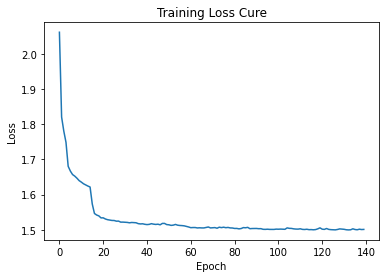

In [44]:
train_and_evaluate(large_train, large_validation, 5e-3, num_epochs=140)

lr = 0.3~0.5, 加载数据函数，使得一次传入多个数据

Epoch [1/140], Loss: 2.1923
Epoch [2/140], Loss: 1.8509
Epoch [3/140], Loss: 1.7485
Epoch [4/140], Loss: 1.7185
Epoch [5/140], Loss: 1.7022
Epoch [6/140], Loss: 1.6928
Epoch [7/140], Loss: 1.6612
Epoch [8/140], Loss: 1.6204
Epoch [9/140], Loss: 1.5993
Epoch [10/140], Loss: 1.5984
Epoch [11/140], Loss: 1.5894
Epoch [12/140], Loss: 1.5818
Epoch [13/140], Loss: 1.5737
Epoch [14/140], Loss: 1.5717
Epoch [15/140], Loss: 1.5690
Epoch [16/140], Loss: 1.5695
Epoch [17/140], Loss: 1.5633
Epoch [18/140], Loss: 1.5599
Epoch [19/140], Loss: 1.5579
Epoch [20/140], Loss: 1.5553
Epoch [21/140], Loss: 1.5541
Epoch [22/140], Loss: 1.5563
Epoch [23/140], Loss: 1.5503
Epoch [24/140], Loss: 1.5489
Epoch [25/140], Loss: 1.5456
Epoch [26/140], Loss: 1.5458
Epoch [27/140], Loss: 1.5471
Epoch [28/140], Loss: 1.5460
Epoch [29/140], Loss: 1.5425
Epoch [30/140], Loss: 1.5454
Epoch [31/140], Loss: 1.5427
Epoch [32/140], Loss: 1.5417
Epoch [33/140], Loss: 1.5410
Epoch [34/140], Loss: 1.5396
Epoch [35/140], Loss: 1

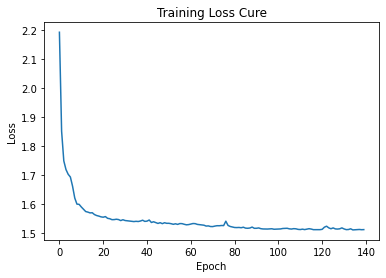

In [36]:
train_and_evaluate(medium_train, medium_validation, lr=5e-4, num_epochs=140)

Epoch [1/200], Loss: 2.3057
Epoch [2/200], Loss: 2.2996
Epoch [3/200], Loss: 2.2913
Epoch [4/200], Loss: 2.2664
Epoch [5/200], Loss: 2.2234
Epoch [6/200], Loss: 2.1828
Epoch [7/200], Loss: 2.1394
Epoch [8/200], Loss: 2.0978
Epoch [9/200], Loss: 2.0627
Epoch [10/200], Loss: 2.0260
Epoch [11/200], Loss: 1.9860
Epoch [12/200], Loss: 1.9515
Epoch [13/200], Loss: 1.9219
Epoch [14/200], Loss: 1.8900
Epoch [15/200], Loss: 1.8631
Epoch [16/200], Loss: 1.8474
Epoch [17/200], Loss: 1.8268
Epoch [18/200], Loss: 1.8060
Epoch [19/200], Loss: 1.7905
Epoch [20/200], Loss: 1.7645
Epoch [21/200], Loss: 1.7542
Epoch [22/200], Loss: 1.7422
Epoch [23/200], Loss: 1.7310
Epoch [24/200], Loss: 1.7259
Epoch [25/200], Loss: 1.7202
Epoch [26/200], Loss: 1.7159
Epoch [27/200], Loss: 1.7128
Epoch [28/200], Loss: 1.7082
Epoch [29/200], Loss: 1.6958
Epoch [30/200], Loss: 1.6856
Epoch [31/200], Loss: 1.6713
Epoch [32/200], Loss: 1.6614
Epoch [33/200], Loss: 1.6531
Epoch [34/200], Loss: 1.6452
Epoch [35/200], Loss: 1

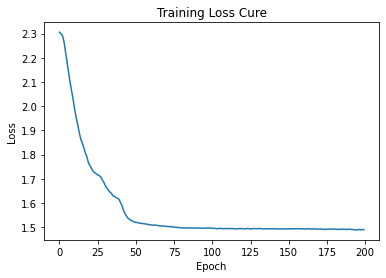

In [53]:
train_and_evaluate(small_train, small_validation,lr=3e-3,num_epochs=200)

x(128, 32)
y(10, 32)
w3(128, 10)
detal3(10,32)

In [77]:
class NpClassificationModel:
    def __init__(self, x_dim, h_dim, y_dim):
        """
        :param x_dim: 输入特征维度 128
        :param h_dim: 隐藏层维度
        :param y_dim: 输出类别维度 10
        :return:
        """
        self.w1 = self._uniform([x_dim, h_dim])
        self.b1 = self._uniform([h_dim, 1])

        self.w2 = self._uniform([h_dim, h_dim])
        self.b2 = self._uniform([h_dim, 1])

        self.w3 = self._uniform([h_dim, y_dim])
        self.b3 = self._uniform([y_dim, 1])


    def _uniform(self, shape):
        """
        初始化权重矩阵
        """
        initial_w = np.random.uniform(-1, 1, size=shape).astype(np.float32)
        return  initial_w

    def _sigmoid(self, x):
        """
        :param x: s输入值
        :return: 经过激活函数的维度
        """
        x = np.clip(x, -88.72, 88.72)
        return 1/ (1 + np.exp(-x))

    def _softmax(self, logits):
        """
        :param logits: 类别得分
        :return: 经过Sigmoid激活的函数
        """
        exp_logits = np.exp(logits - np.max(logits, axis=0, keepdims=True))
        return exp_logits / np.sum(exp_logits, axis=0, keepdims=True)

    def forward(self, x):
        """前向传播"""
        self.x = x

        self.z1 = self.w1.T @self.x +self.b1
        self.a1 = self._sigmoid(self.z1)

        self.z2 = self.w2.T @ self.a1 + self.b2
        self.a2 = self._sigmoid(self.z2)

        self.z3 = self.w3.T @ self.a2 +self.b3
        self.y_hat = self._sigmoid(self.z3)

        return self.y_hat


    def loss(self, y_hat, y):
        """
        交叉熵损失
        :param y_hat:
        :param y:
        :return:
        """
        self.y = y
        epsilon = 1e-15
        y_hat = np.clip(y_hat, epsilon, 1-epsilon)
        m = y.shape[1]
        loss = -1 / m * sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        return  loss
    def backward(self):
        """计算权重矩阵的梯度"""
        # BP1
        self.deltal_3 = self.y_hat - self.y
        # BP2
        # print(f'w3维度{self.w3.shape}')
        # print(f'detal_3维度{self.deltal_3.shape}')
        # print(f'sigmoid{self._sigmoid(self.z2).shape}')

        self.deltal_2 = self.w3 @ self.deltal_3 * (self._sigmoid(self.z2) * (1 - self._sigmoid(self.z2)))
        self.deltal_1 = self.w2 @ self.deltal_2 * (self._sigmoid(self.z1) * (1 - self._sigmoid(self.z1)))

        # BP3
        self.w_g3 = self.a2 @ self.deltal_3.T
        self.w_g2 = self.a1 @ self.deltal_2.T
        self.w_g1 = self.x @ self.deltal_1.T

        # BP4
        self.b_g3 = self.deltal_3.mean(axis=1, keepdims=True)
        self.b_g2 = self.deltal_2.mean(axis=1, keepdims=True)
        self.b_g1 = self.deltal_1.mean(axis = 1, keepdims=True)

    def zero_gard(self):
        self.deltal_3 = 0
        self.deltal_2 = 0
        self.deltal_1 = 0
        # BP3
        self.w_g3 = 0
        self.w_g2 = 0
        self.w_g1 = 0

        # BP4
        self.b_g3 = 0
        self.b_g2 = 0
        self.b_g1 = 0

    def step(self, lr=0.001):
        self.w1 -= lr * self.w_g1
        self.b1 -= lr * self.b_g1

        self.w2 -= lr * self.w_g2
        self.b2 -= lr * self.b_g2

        self.w3 -= lr * self.w_g3
        self.b3 -= lr * self.b_g3

    def evaluate(self, x_test, y_test):
        """
         在测试集上评估模型准确率
        :param x_test: 测试集特征
        :param y_test: 测试集标签
        :return: 准确率
        """
        # 前向传播
        y_pred = self.forward(x_test)

        # 计算准确率
        labels = np.argmax(y_pred, axis=0)
        true_labels = np.argmax(y_test, axis=0)
        accuracy = np.mean(labels == true_labels)

        return accuracy


In [78]:
class ClassificationData:
    def __init__(self, train_data, test_data, valid_data,  batch_size = 32):
        num_classes = 10
        self.y_train = train_data.iloc[:, 0].values
        self.x_train = train_data.iloc[:, 1:].values

        self.y_valid = valid_data.iloc[:, 0].values
        self.x_valid = valid_data.iloc[:, 1:].values

        self.y_test = test_data.iloc[:, 0].values
        self.x_test = test_data.iloc[:, 1:].values

        # 创建one-hat
        self.y_train = self.y_train.astype(int)
        self.y_test = self.y_test.astype(int)
        self. y_valid = self.y_valid.astype(int)

        self.y_train = np.eye(num_classes)[self.y_train]
        self.y_test = np.eye(num_classes)[self.y_test]
        self.y_valid = np.eye(num_classes)[self.y_valid]

        # 数据集的形状应该是（128，batch_size）
        self.x_train = self.x_train.T
        self.y_train = self.y_train.T
        self.x_test = self.x_test.T
        self.y_test = self.y_test.T
        self.x_valid = self.x_valid.T
        self.y_valid = self.y_valid.T

        self.batch_size = batch_size

        self.total_batches = self.x_train.shape[1] // self.batch_size


    def get_batch_data(self, i):
        start_idx = i * self.batch_size
        end_idx = (i + 1) * self.batch_size

        x_batch = self.x_train[:, start_idx:end_idx]
        y_batch = self.y_train[:, start_idx:end_idx]

        return x_batch, y_batch

In [85]:
dataset_l = ClassificationData(train_data=large_train,
                               test_data=large_train, valid_data=large_validation)
dataset_m = ClassificationData(train_data=medium_train,
                               test_data=medium_train, valid_data=medium_validation)
dataset_s = ClassificationData(train_data=small_train,
                               test_data=small_train,
                               valid_data=small_validation)
def train(x_train, y_train, x_test, y_test):
    my_model = NpClassificationModel(x_dim=x_train.shape[0], h_dim=128, y_dim=y_train.shape[0])
    train_losses = []
    test_accuracies =[]
    epoch_num = 200
    lr = 1e-3

    for epoch in range(epoch_num):
        losses = 0
        correct_predictions = 0
        for i in range(dataset_l.total_batches):
            x_batch, y_batch = dataset_l.get_batch_data(i)
            # print(f"x维度{x_batch.shape}")
            # print(f'y维度{y_batch.shape}')
            #   前向传播
            y_pred = my_model.forward(x_batch)

            # print(f'{y_pred.shape}')
            #loss
            loss = my_model.loss(y_pred, y_batch)
            losses +=loss
            # 准确率
            labels = np.argmax(y_pred, axis=0)
            true_labels = np.argmax(y_batch,axis=0)
            correct_predictions += (labels == true_labels).sum()

            # 反向传播
            my_model.backward()

            #梯度下降
            my_model.step(lr=lr)

        avg_loss = np.mean(losses)
        acc = float(correct_predictions) / (dataset_l.batch_size * dataset_l.total_batches)
        test_accuracy = my_model.evaluate(x_test, y_test)
        test_accuracies.append(test_accuracy)

        print(f'epoch{epoch+1}, loss:{avg_loss:.4f}, acc:{acc:.4f}, test_acc:{test_accuracy:.4f}')
        train_losses.append(avg_loss)
    # my_model.save("Classfication_model.pkl")
    plt.plot(range(1,epoch_num+1), train_losses, label="Training loss")
    plt.title("Training Loss over Epochs")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(range(1,epoch_num+1), test_accuracies, label='Test Accuracy')
    plt.title('Test Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    Label_data = {0:'a', 1:'e', 2:'g', 3:'i', 4:'l', 5:'n', 6:'o', 7:'r', 8:'t', 9:'u'}
    def show_random_test_images(dataset, model, num_images=5):
        random_indices = np.random.choice(dataset.x_test.shape[1], num_images, replace=False)

        for i, idx in enumerate(random_indices):
            x_data = dataset.x_test[:, idx]
            y_true = dataset.y_test[:, idx]

            # 进行预测
            y_pred = model.forward(x_data.reshape((-1, 1)))

            # 显示图像
            plt.subplot(1, num_images, i + 1)
            plt.imshow(x_data.reshape((16, 8)), cmap='gray')
            plt.title(f'True: {Label_data[np.argmax(y_true)]}\nPred: {Label_data[np.argmax(y_pred)]}')
            plt.axis('off')

    plt.show()
    show_random_test_images(dataset_l, my_model)


epoch1, loss:28.4997, acc:0.2761, test_acc:0.4526
epoch2, loss:20.2636, acc:0.5294, test_acc:0.5946
epoch3, loss:17.5626, acc:0.6256, test_acc:0.6604
epoch4, loss:15.9402, acc:0.6790, test_acc:0.7020
epoch5, loss:14.8167, acc:0.7133, test_acc:0.7289
epoch6, loss:13.9811, acc:0.7348, test_acc:0.7471
epoch7, loss:13.3264, acc:0.7504, test_acc:0.7606
epoch8, loss:12.7920, acc:0.7630, test_acc:0.7708
epoch9, loss:12.3416, acc:0.7724, test_acc:0.7789
epoch10, loss:11.9525, acc:0.7801, test_acc:0.7860
epoch11, loss:11.6094, acc:0.7861, test_acc:0.7936
epoch12, loss:11.3021, acc:0.7929, test_acc:0.7996
epoch13, loss:11.0234, acc:0.7997, test_acc:0.8058
epoch14, loss:10.7678, acc:0.8062, test_acc:0.8102
epoch15, loss:10.5314, acc:0.8116, test_acc:0.8144
epoch16, loss:10.3113, acc:0.8147, test_acc:0.8184
epoch17, loss:10.1051, acc:0.8184, test_acc:0.8219
epoch18, loss:9.9111, acc:0.8215, test_acc:0.8249
epoch19, loss:9.7278, acc:0.8243, test_acc:0.8288
epoch20, loss:9.5539, acc:0.8276, test_acc

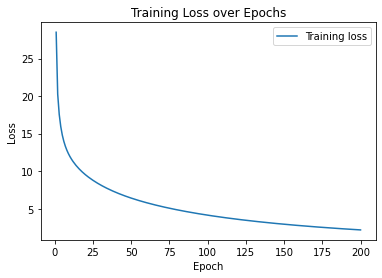

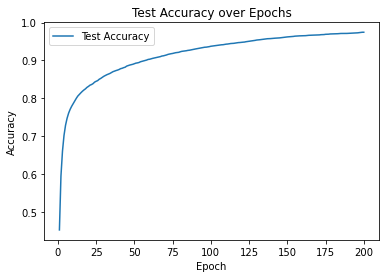

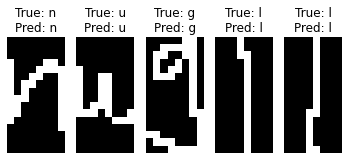

In [86]:
train(dataset_l.x_train,dataset_l.y_train, dataset_l.x_test, dataset_l.y_test)

epoch1, loss:29.0047, acc:0.2612, test_acc:0.4079
epoch2, loss:20.6289, acc:0.5007, test_acc:0.5519
epoch3, loss:17.6874, acc:0.6137, test_acc:0.6165
epoch4, loss:16.0294, acc:0.6665, test_acc:0.6535
epoch5, loss:14.9179, acc:0.6995, test_acc:0.6765
epoch6, loss:14.0903, acc:0.7256, test_acc:0.6921
epoch7, loss:13.4325, acc:0.7404, test_acc:0.7053
epoch8, loss:12.8869, acc:0.7531, test_acc:0.7145
epoch9, loss:12.4209, acc:0.7619, test_acc:0.7255
epoch10, loss:12.0142, acc:0.7726, test_acc:0.7327
epoch11, loss:11.6535, acc:0.7804, test_acc:0.7425
epoch12, loss:11.3295, acc:0.7875, test_acc:0.7497
epoch13, loss:11.0353, acc:0.7939, test_acc:0.7548
epoch14, loss:10.7660, acc:0.7995, test_acc:0.7630
epoch15, loss:10.5175, acc:0.8046, test_acc:0.7672
epoch16, loss:10.2866, acc:0.8111, test_acc:0.7720
epoch17, loss:10.0711, acc:0.8157, test_acc:0.7774
epoch18, loss:9.8688, acc:0.8187, test_acc:0.7812
epoch19, loss:9.6782, acc:0.8248, test_acc:0.7842
epoch20, loss:9.4979, acc:0.8286, test_acc

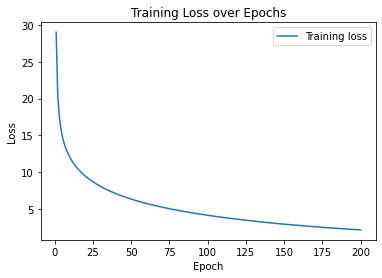

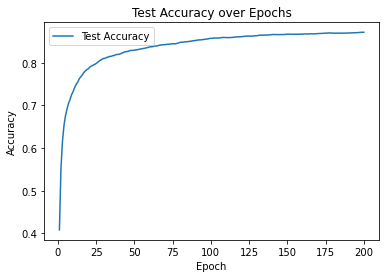

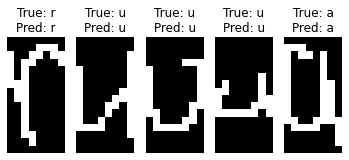

In [87]:
train(dataset_m.x_train,dataset_m.y_train, dataset_m.x_test, dataset_m.y_test)

epoch1, loss:29.9891, acc:0.2538, test_acc:0.4269
epoch2, loss:20.6556, acc:0.5077, test_acc:0.6052
epoch3, loss:17.8462, acc:0.6183, test_acc:0.6513
epoch4, loss:16.1383, acc:0.6713, test_acc:0.7014
epoch5, loss:14.9532, acc:0.7048, test_acc:0.7295
epoch6, loss:14.0718, acc:0.7252, test_acc:0.7435
epoch7, loss:13.3821, acc:0.7420, test_acc:0.7555
epoch8, loss:12.8216, acc:0.7537, test_acc:0.7595
epoch9, loss:12.3523, acc:0.7642, test_acc:0.7695
epoch10, loss:11.9494, acc:0.7719, test_acc:0.7796
epoch11, loss:11.5965, acc:0.7796, test_acc:0.7856
epoch12, loss:11.2819, acc:0.7847, test_acc:0.7876
epoch13, loss:10.9977, acc:0.7923, test_acc:0.7896
epoch14, loss:10.7381, acc:0.7977, test_acc:0.7976
epoch15, loss:10.4987, acc:0.8030, test_acc:0.7976
epoch16, loss:10.2764, acc:0.8071, test_acc:0.8016
epoch17, loss:10.0687, acc:0.8117, test_acc:0.8036
epoch18, loss:9.8735, acc:0.8161, test_acc:0.8056
epoch19, loss:9.6894, acc:0.8205, test_acc:0.8116
epoch20, loss:9.5151, acc:0.8242, test_acc

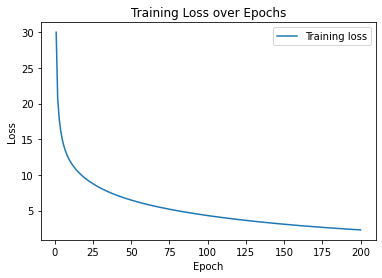

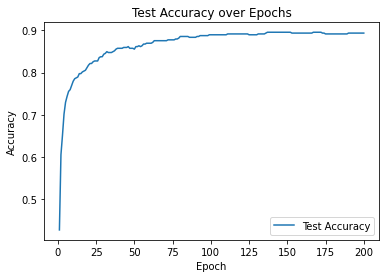

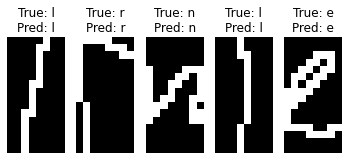

In [88]:
train(dataset_s.x_train,dataset_s.y_train, dataset_s.x_test, dataset_s.y_test)

### 实验总结与分析：

1. **实验目标:**
   - 该实验的目标是使用NumPy实现一个神经网络进行图像分类。

2. **模型架构:**
   - 实现的模型是一个简单的前馈神经网络，包含三层：输入层，具有Sigmoid激活函数的隐藏层，以及具有Sigmoid激活函数的输出层。

3. **数据预处理:**
   - 数据集包含将图像表示为128维向量的图像。图像被分为十个类别，由标签"a"，"e"，"g"，"i"，"l"，"n"，"o"，"r"，"t"和"u"表示。
   - 使用one-hat编码表示分类标签。

4. **训练过程:**
   - 训练过程涉及通过时期和批次进行迭代，执行前向和反向传播，通过梯度下降更新权重，并计算和监控损失和准确性。

5. **损失函数:**
   - 采用交叉熵损失函数进行训练

6. **问题和解决方案:**
   - 在实验中遇到一些问题，例如维度不匹配、损失无法降低等。
   - 解决问题的过程中使用了一些调试技巧，例如打印关键变量的形状等。

